# Oasis Infobyte Data Science (October 2023)

## Task 3: Car Prediction


# Yash Chavan

# DJ Sanghvi College of Engineering

# Importing Modules

In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
%matplotlib inline

# Loading Data

In [2]:
car_data = pd.read_csv(r"C:\Users\DELL\OneDrive\Documents\Oasis Infobyte\Task 3\cardata.csv")

# Processing Data

In [5]:
car_data.head()

,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [10]:
car_data = pd.get_dummies(car_data, columns=["Fuel_Type", "Selling_type", "Transmission"])

In [11]:
current_year = pd.Timestamp.now().year
car_data["Car_Age"] = current_year - car_data["Year"]
car_data = car_data.drop("Year", axis=1)

In [12]:
scaler = MinMaxScaler()
car_data[["Driven_kms", "Car_Age"]] = scaler.fit_transform(car_data[["Driven_kms", "Car_Age"]])

# Data Analysis

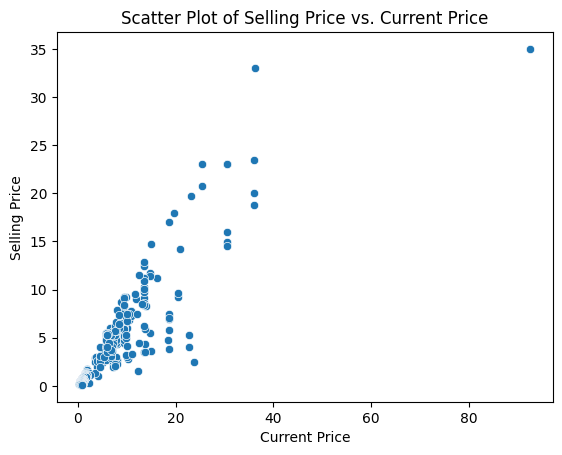

In [13]:
sns.scatterplot(data=car_data, x="Present_Price", y="Selling_Price")
plt.title("Scatter Plot of Selling Price vs. Current Price")
plt.xlabel("Current Price")
plt.ylabel("Selling Price");

In [14]:
#car_data = car_data.drop(car_data["Present_Price"].idxmax())

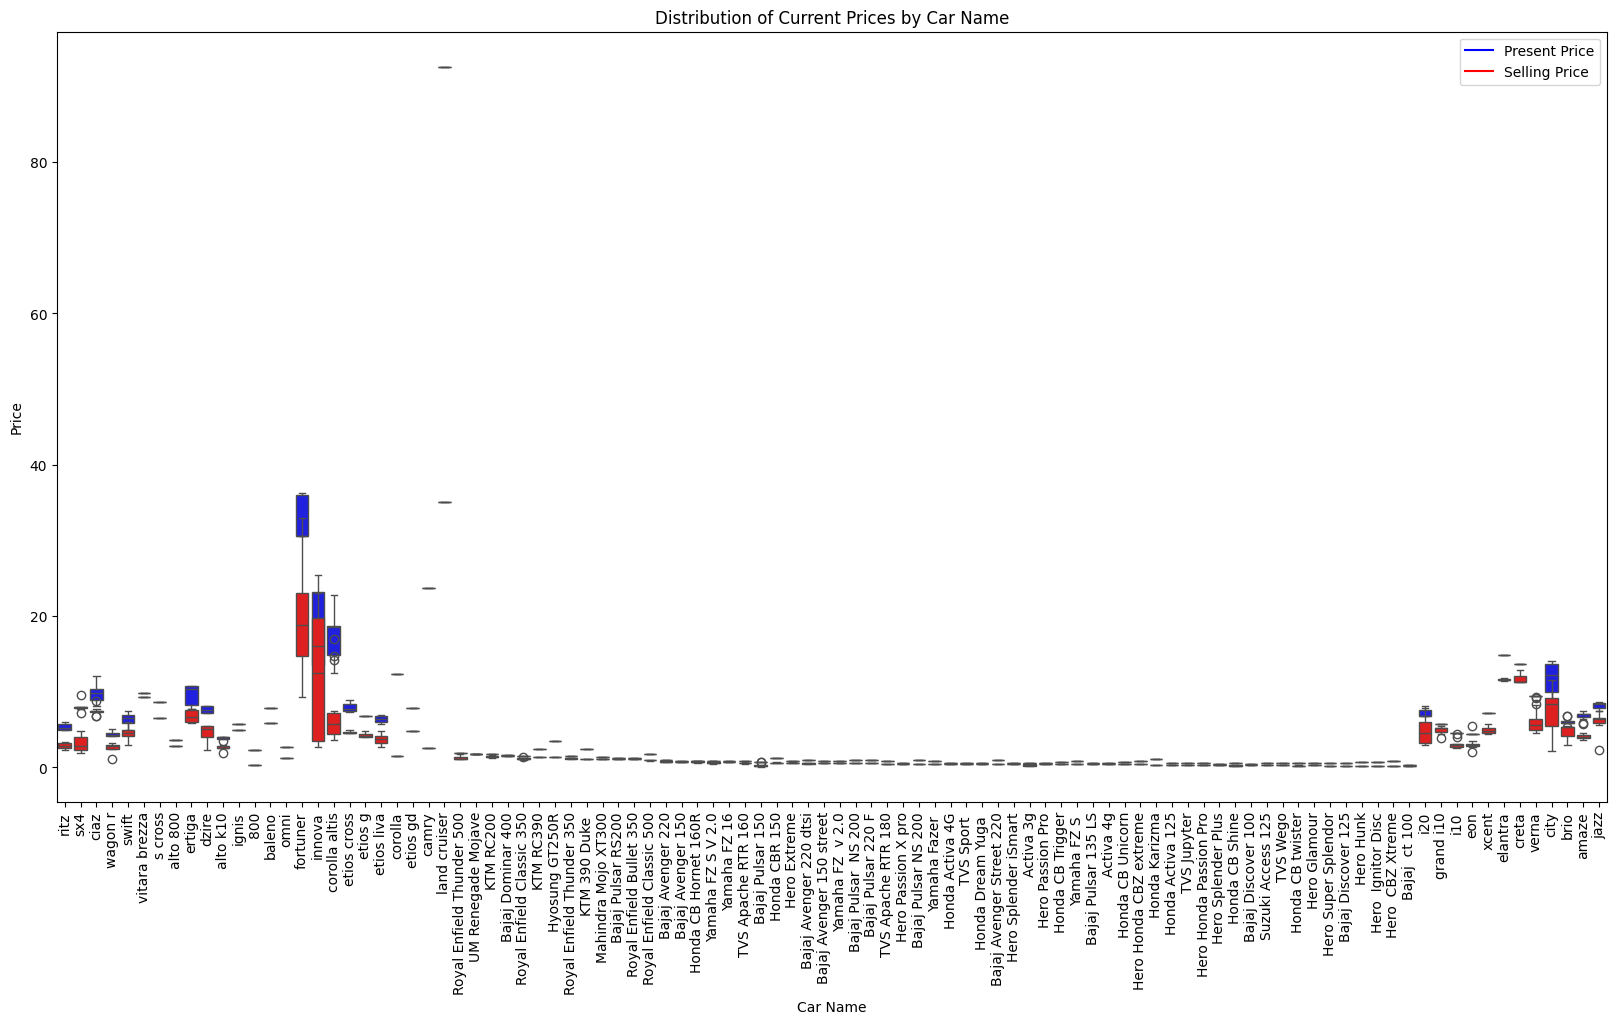

In [15]:
plt.figure(figsize=(20, 10)) 
sns.boxplot(data=car_data, x="Car_Name", y="Present_Price", color="blue")
sns.boxplot(data=car_data, x="Car_Name", y="Selling_Price", color="red")
plt.xticks(rotation=90) 
plt.title("Distribution of Current Prices by Car Name")
plt.xlabel("Car Name")
plt.ylabel("Price")
legend_elements = [Line2D([0], [0], color="blue", label="Present Price"),
                  Line2D([0], [0], color="red", label="Selling Price")]
plt.legend(handles=legend_elements);

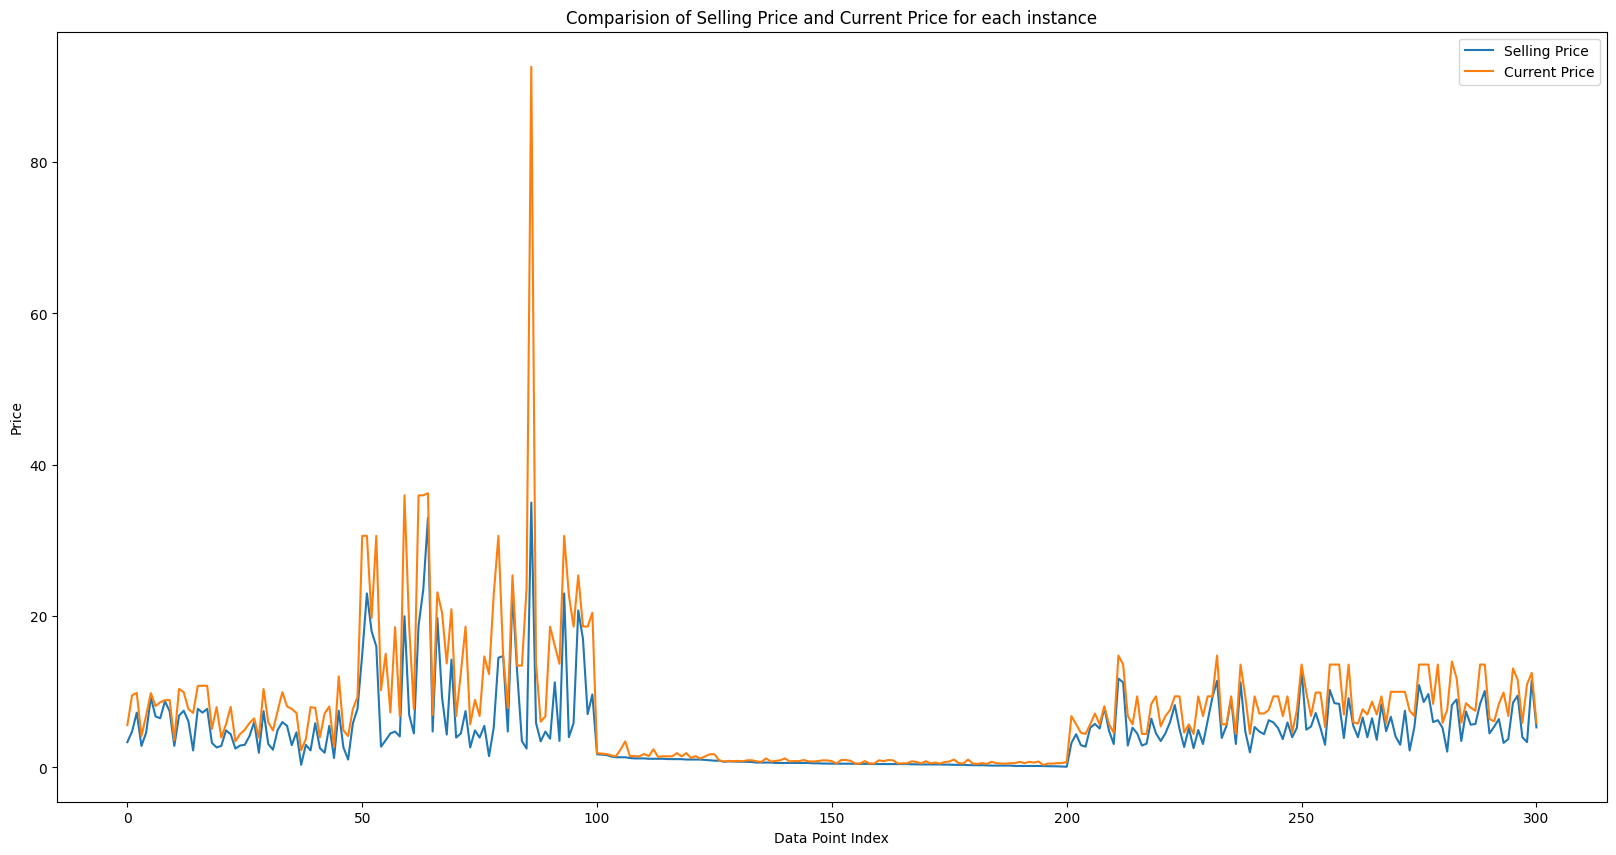

In [16]:
plt.figure(figsize=(20, 10))
sns.lineplot(data=car_data, x=car_data.index, y="Selling_Price", label="Selling Price")
sns.lineplot(data=car_data, x=car_data.index, y="Present_Price", label="Current Price")

plt.title("Comparision of Selling Price and Current Price for each instance")
plt.xlabel("Data Point Index")
plt.ylabel("Price")
plt.legend();

# Training the model

In [17]:
X = car_data.drop(["Car_Name", "Selling_Price"], axis=1)
y = car_data["Selling_Price"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
X.head()

,Present_Price,Driven_kms,Owner,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Dealer,Selling_type_Individual,Transmission_Automatic,Transmission_Manual,Car_Age
0,5.59,0.053053,0,False,False,True,True,False,False,True,0.266667
1,9.54,0.085085,0,False,True,False,True,False,False,True,0.333333
2,9.85,0.012813,0,False,False,True,True,False,False,True,0.066667
3,4.15,0.009409,0,False,False,True,True,False,False,True,0.466667
4,6.87,0.083984,0,False,True,False,True,False,False,True,0.266667


In [20]:
y.describe()

count    301.000000
mean       4.661296
std        5.082812
min        0.100000
25%        0.900000
50%        3.600000
75%        6.000000
max       35.000000
Name: Selling_Price, dtype: float64

In [21]:
linear_reg = LinearRegression()
decision_tree_reg = DecisionTreeRegressor()
random_forest_reg = RandomForestRegressor()

In [22]:
linear_reg.fit(X_train, y_train)
decision_tree_reg.fit(X_train, y_train)
random_forest_reg.fit(X_train, y_train)

RandomForestRegressor()

# Evaluating the models

In [23]:
linear_reg_predictions = linear_reg.predict(X_test)
decision_tree_predictions = decision_tree_reg.predict(X_test)
random_forest_predictions = random_forest_reg.predict(X_test)

In [24]:
linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)
decision_tree_mse = mean_squared_error(y_test, decision_tree_predictions)
random_forest_mse = mean_squared_error(y_test, random_forest_predictions)

print("Linear Regression MSE:", linear_reg_mse)
print("Decision Tree MSE:", decision_tree_mse)
print("Random Forest MSE:", random_forest_mse)

Linear Regression MSE: 3.481349830511855
Decision Tree MSE: 1.2566737704918032
Random Forest MSE: 0.8514905285245902


# Comparision of the models

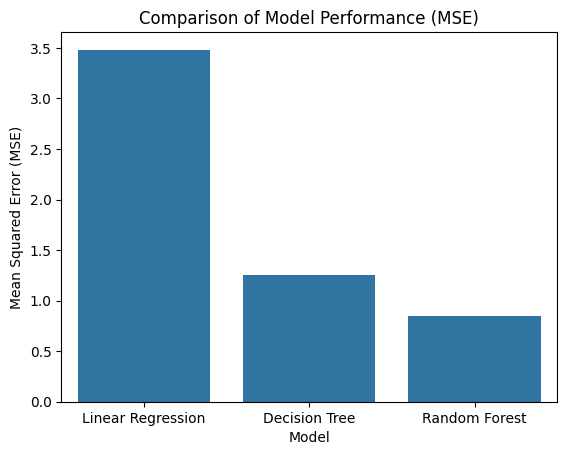

In [25]:
x1 = ["Linear Regression", "Decision Tree", "Random Forest"]
y1 = [linear_reg_mse, decision_tree_mse, random_forest_mse]

sns.barplot(x=x1, y=y1)
plt.title("Comparison of Model Performance (MSE)")
plt.xlabel("Model")
plt.ylabel("Mean Squared Error (MSE)");

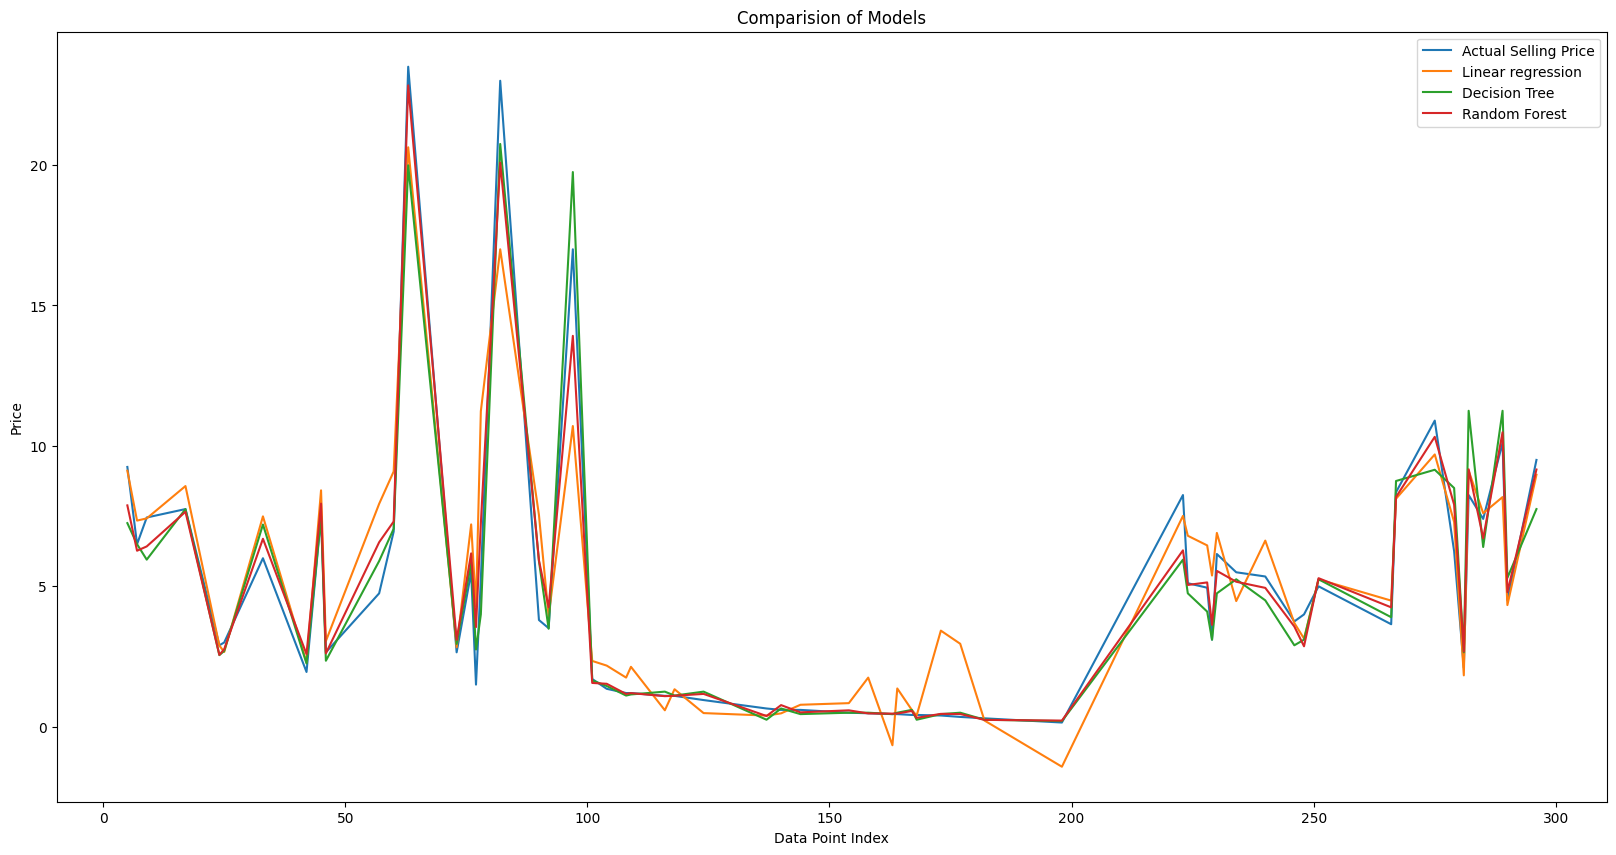

In [26]:
compare = pd.DataFrame({
    "Selling_Price": y_test,
    "Linear_Regression_Predictions": linear_reg_predictions,
    "Decision_Tree_Predictions": decision_tree_predictions,
    "Random_Forest_Predictions": random_forest_predictions
})

plt.figure(figsize=(20, 10))
sns.lineplot(data=compare, x=compare.index, y="Selling_Price", label="Actual Selling Price")
sns.lineplot(data=compare, x=compare.index, y="Linear_Regression_Predictions", label="Linear regression")
sns.lineplot(data=compare, x=compare.index, y="Decision_Tree_Predictions", label="Decision Tree")
sns.lineplot(data=compare, x=compare.index, y="Random_Forest_Predictions", label="Random Forest")

plt.title("Comparision of Models")
plt.xlabel("Data Point Index")
plt.ylabel("Price")
plt.legend();


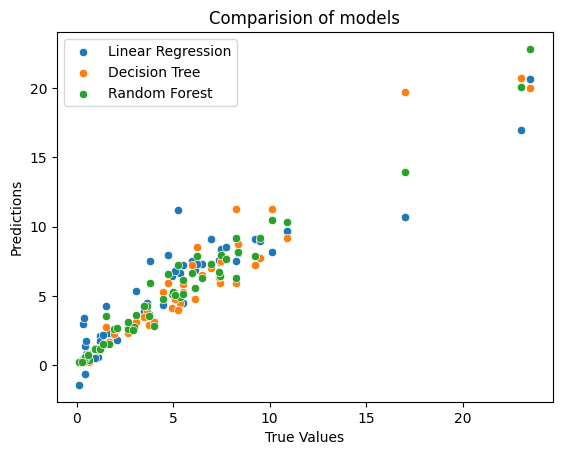

In [27]:
sns.scatterplot(data=compare, x="Selling_Price", y="Linear_Regression_Predictions", label="Linear Regression")
sns.scatterplot(data=compare, x="Selling_Price", y="Decision_Tree_Predictions", label="Decision Tree")
sns.scatterplot(data=compare, x="Selling_Price", y="Random_Forest_Predictions", label="Random Forest")

plt.title("Comparision of models")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.legend();

# Encoding the car names to test influence on predictions

In [28]:
car_data2 = pd.get_dummies(car_data, columns=["Car_Name"])

In [29]:
car_data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Columns: 110 entries, Selling_Price to Car_Name_xcent
dtypes: bool(105), float64(4), int64(1)
memory usage: 42.8 KB


# Training

In [30]:
X2 = car_data2.drop("Selling_Price", axis=1)
y2 = car_data2["Selling_Price"]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size=0.2, random_state=42)

In [31]:
random_forest_reg2 = RandomForestRegressor()

In [32]:
random_forest_reg2.fit(X_train2, y_train2)

RandomForestRegressor()

# Evaluating

In [33]:
random_forest_predictions2 = random_forest_reg2.predict(X_test2)

In [34]:
random_forest_mse2 = mean_squared_error(y_test2, random_forest_predictions2)
print("Random Forest 2 MSE :", random_forest_mse2)

Random Forest 2 MSE : 0.8455431081967225


# Comparison

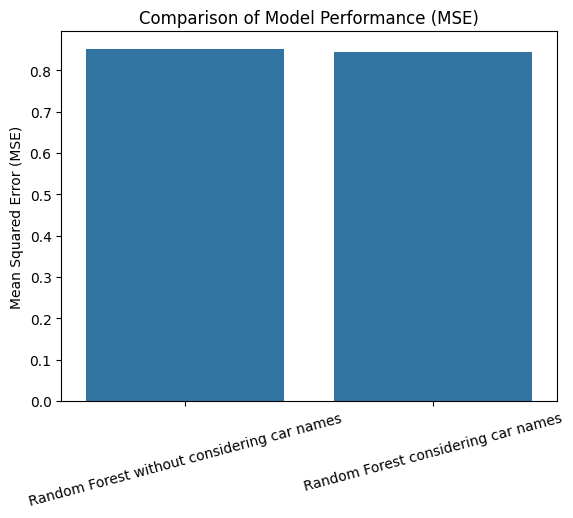

In [35]:
x3 = ["Random Forest without considering car names", "Random Forest considering car names"]
y3 = [random_forest_mse, random_forest_mse2]

sns.barplot(x=x3, y=y3)
plt.title("Comparison of Model Performance (MSE)")
plt.ylabel("Mean Squared Error (MSE)")
plt.xticks(rotation=15);

In [36]:
compare["Random_Forest_Predictions2"] = random_forest_predictions2

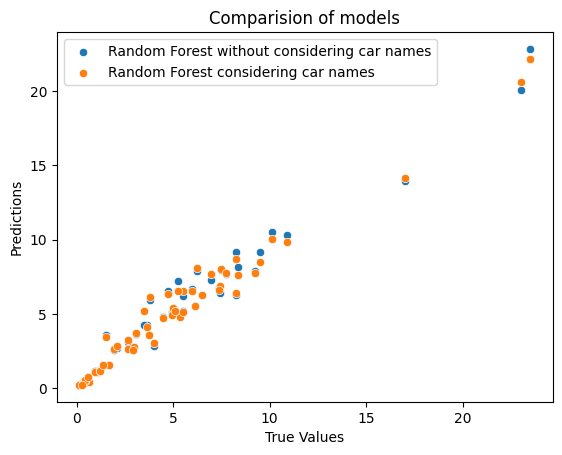

In [37]:
sns.scatterplot(data=compare, x="Selling_Price", y="Random_Forest_Predictions", label="Random Forest without considering car names")
sns.scatterplot(data=compare, x="Selling_Price", y="Random_Forest_Predictions2", label="Random Forest considering car names")

plt.title("Comparision of models")
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.legend();

# Conclusion